In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# first read random file of 10000 valid roman numerals, then convert into list
data = pd.read_csv("numerals.csv")
test_data = data.columns.tolist()[:]


In [6]:
# run algorithm, and catch any errors caused by faulty numerals and ignore them

def romanToInt(s: str) -> int:
        """
        :type s: str
        :rtype: int
        """
        # total complexities:
        # Time: O(n), Space: O(1)
        
        totalInt = 0
        conversionDict = {"I":1, "V":5, "X":10, "L":50, "C":100, "D":500, "M":1000}
        
        # reverse string: time and space complexity of O(n) and O(1) respectively
        s = s[::-1]
        
        # search through each letter of word and add into num_dict: time and space complexity of O(n) and O(1) respectively
        i = 0
        length = len(s)
        while i < length:
            if(i == length - 1):
                totalInt += conversionDict[s[i]]
                i += 1
                continue
            
            # check if V, X, L, C, D and M has its corresponding precursor
            try:
                if (s[i] == "V") or (s[i] == "X"):
                    if(s[i+1] == "I"):
                        totalInt += conversionDict[s[i]] - 1
                        i += 2
                    else:
                        totalInt += conversionDict[s[i]]
                        i += 1

                elif(s[i] == "L") or (s[i] == "C"):
                    if(s[i+1] == "X"):
                        totalInt += conversionDict[s[i]] - 10
                        i += 2
                    else:
                        totalInt += conversionDict[s[i]]
                        i += 1

                elif (s[i] == "D") or (s[i] == "M"):
                    if(s[i+1] == "C"):
                        totalInt += conversionDict[s[i]] - 100
                        i += 2
                    else:
                        totalInt += conversionDict[s[i]]
                        i += 1
                # if not, simply add the value in
                else:
                    totalInt += conversionDict[s[i]]
                    i += 1
            except KeyError:
                return None
                
        return totalInt

In [7]:
import timeit

#calculate runtime of algorithm
def CalculateRuntime(fun: callable, args: tuple) -> float:
    start = timeit.default_timer()
    if(fun(args) == None): return None
    else:
        stop = timeit.default_timer()
        return (stop-start)

removed 494 out of 10000 bad apples in data


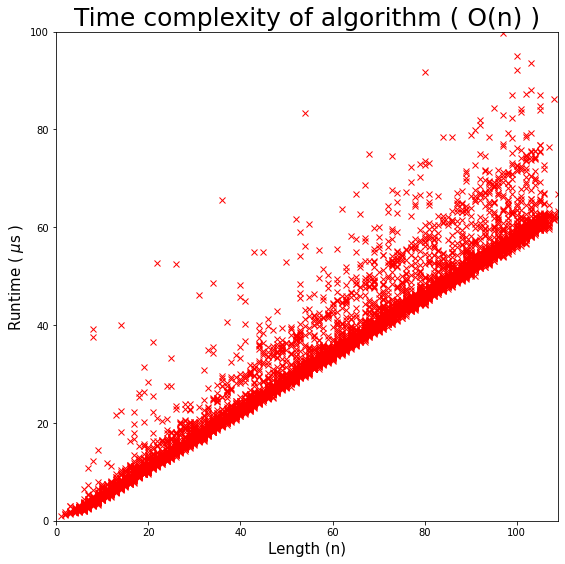

In [19]:
# set parameters for plotting and plot time complexity

fig, ax = plt.subplots(figsize = (9, 9))
ax.set_xlabel("Length (n)", fontsize = 15)
ax.set_ylabel(r"Runtime ( $\mu$s )", fontsize = 15)
ax.set_xlim(0, 150)
ax.set_ylim(0, 1e-4)
ax.set_title("Time complexity of algorithm ( O(n) )", fontsize = 25)

xcol, ycol = [], []
counter = 0
for numeral in test_data:
    numeralLen = len(numeral)
    runTime = CalculateRuntime(romanToInt, numeral)
    if(runTime != None):
        xcol.append(numeralLen)
        ycol.append(runTime * 1e6)
        
    else: counter += 1

print(f"removed {counter} out of {len(test_data)} bad apples in data")
ax.set_xlim(0, max(xcol))
ax.set_ylim(0, 100)

ax.plot(xcol, ycol, "rx")
